<a href="https://colab.research.google.com/github/Shamil2007/Machine-Learning/blob/main/Credit_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!kaggle datasets download parisrohan/credit-score-classification

Dataset URL: https://www.kaggle.com/datasets/parisrohan/credit-score-classification
License(s): CC0-1.0
credit-score-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [23]:
!unzip /content/credit-score-classification.zip

Archive:  /content/credit-score-classification.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


In [24]:
import pandas as pd  # For data manipulation
import numpy as np    # For numerical operations
import matplotlib.pyplot as plt  # For plotting graphs

In [25]:
df = pd.read_csv("/content/train.csv")
df

<ipython-input-25-3db7de31d78d>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [26]:
# Removes specified columns from the dataframe

df.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN'], inplace = True)

In [27]:
# Checking the data types and non-null counts of each column in the dataframe
# We'll address the data type issues in the next cell, and handle count issues in the pipeline

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [28]:
# Function to convert specified columns in the dataframe to float, cleaning invalid characters
def to_float(df, columns):
    # Helper function to clean and convert each row to float
    def convert_row(row):
        if pd.isna(row):
            return None

        new_row = ''
        for i in str(row):
            if i.isdigit() or i == '.':
                new_row += i

        return float(new_row) if new_row else None

    for col in columns:
        df[col] = df[col].apply(convert_row)
    return df

columns = ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Monthly_Balance', 'Amount_invested_monthly']
df = to_float(df, columns)

In [29]:
# Checking the dataframe info again after fixing the type issues
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [30]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,1.000000e+05,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,92998.000000,97909.000000,98035.000000,100000.000000,100000.000000,100000.000000,95521.000000,9.880000e+04
mean,119.509700,1.764157e+05,4194.170850,17.091280,22.47443,72.466040,10.761960,21.068780,30.946268,10.465678,27.754251,1426.220376,32.285173,1403.118217,637.412998,3.036437e+22
std,684.757313,1.429618e+06,3183.686167,117.404834,129.05741,466.422621,61.789933,14.860104,226.028754,6.670732,193.177339,1155.129026,5.116875,8306.041270,2043.319327,3.181295e+24
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,7.759665e-03
25%,25.000000,1.945750e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.350000,3.000000,566.072500,28.052567,30.306660,74.534002,2.701145e+02
50%,34.000000,3.757861e+04,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.155000,32.305784,69.249473,135.925682,3.367423e+02
75%,42.000000,7.279092e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1945.962500,36.496663,161.224249,265.731733,4.703321e+02
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,10000.000000,3.333333e+26


In [31]:
# Dropping unnecessary columns from the dataframe
columns = ["Interest_Rate", "Num_Credit_Card", 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Payment_of_Min_Amount']
df = df.drop(columns, axis = 1)
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Monthly_Balance,Credit_Score
0,January,23.0,Scientist,19114.12,1824.843333,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,312.494089,Good
1,February,23.0,Scientist,19114.12,NaN,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,284.629162,Good
2,March,500.0,Scientist,19114.12,NaN,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7.0,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,331.209863,Good
3,April,23.0,Scientist,19114.12,NaN,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4.0,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,223.451310,Good
4,May,23.0,Scientist,19114.12,1824.843333,3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25.0,Mechanic,39628.99,3359.415833,4,2.0,"Auto Loan, and Student Loan",23,7.0,11.50,3.0,_,502.38,34.663572,31 Years and 6 Months,479.866228,Poor
99996,May,25.0,Mechanic,39628.99,3359.415833,4,2.0,"Auto Loan, and Student Loan",18,7.0,11.50,3.0,_,502.38,40.565631,31 Years and 7 Months,496.651610,Poor
99997,June,25.0,Mechanic,39628.99,3359.415833,4,2.0,"Auto Loan, and Student Loan",27,6.0,11.50,3.0,Good,502.38,41.255522,31 Years and 8 Months,516.809083,Poor
99998,July,25.0,Mechanic,39628.99,3359.415833,4,2.0,"Auto Loan, and Student Loan",20,NaN,11.50,3.0,Good,502.38,33.638208,31 Years and 9 Months,319.164979,Standard


In [32]:
# Start feature engineering: creating features to improve the model's performance

# Calculate debt-to-income ratio
def calculate_debt_to_income(outstanding_debt, monthly_inhand_salary):
    if pd.isna(outstanding_debt) or pd.isna(monthly_inhand_salary) or monthly_inhand_salary == 0:
        return np.nan
    return outstanding_debt / monthly_inhand_salary

# Calculate debt balance ratio
def calculate_debt_balance_ratio(outstanding_debt, monthly_balance):
    if pd.isna(outstanding_debt) or pd.isna(monthly_balance) or monthly_balance == 0:
        return np.nan
    return outstanding_debt / monthly_balance


df['debt_to_income'] = df.apply(
    lambda row: calculate_debt_to_income(row['Outstanding_Debt'], row['Monthly_Inhand_Salary']), axis=1
)

df['debt_balance_ratio'] = df.apply(
    lambda row: calculate_debt_balance_ratio(row['Outstanding_Debt'], row['Monthly_Balance']), axis=1
)


In [33]:
# Displays the minimum and maximum values of the 'Age' column to identify inappropriate values
df.Age.min(), df.Age.max()

(14.0, 8698.0)

In [34]:
# Removing rows with 'Age' less than 16 or greater than 99

df.loc[df['Age'] < 16] = df.loc[df['Age'] < 16].drop('Age', axis = 1)
df.loc[df['Age'] > 99] = df.loc[df['Age'] > 99].drop('Age', axis = 1)

In [35]:
# Splitting the dataset into features (X) and target (y)

X = df.drop('Credit_Score', axis = 1)
y = df['Credit_Score'].copy()

In [36]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# Splitting the features into numerical (Num) and categorical (Cat) columns

X_num_train = X_train.select_dtypes(include = np.number)
X_cat_train = X_train.select_dtypes(include = 'object')

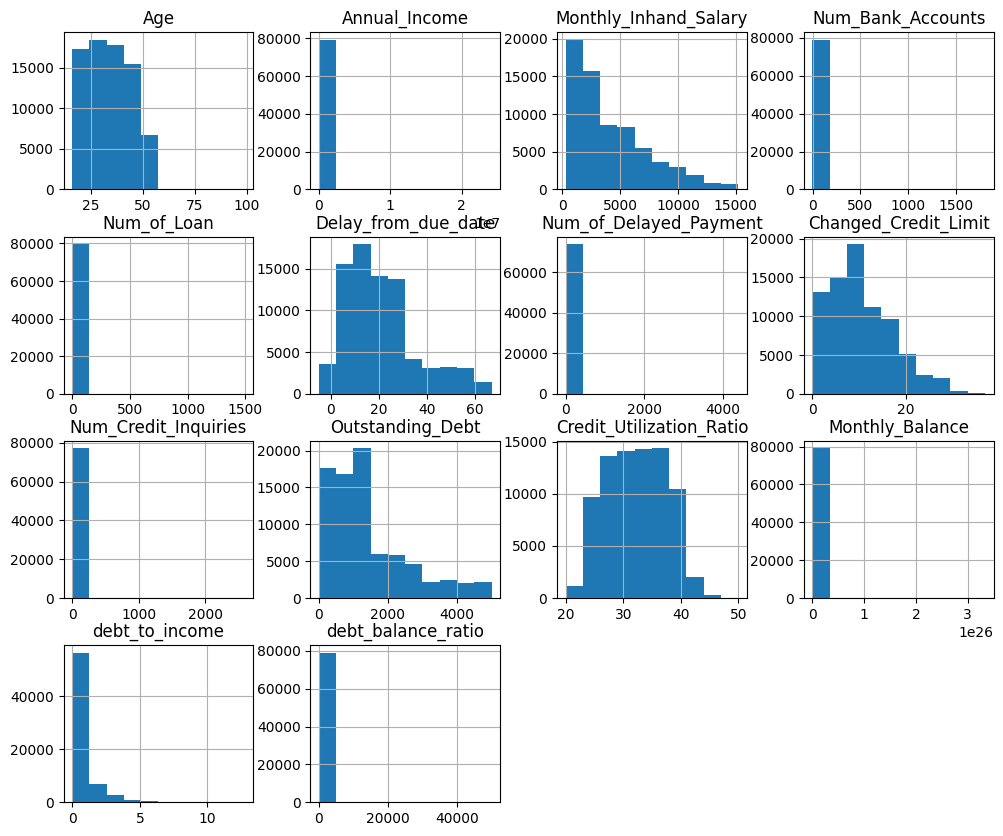

In [38]:
# Visualizing the distribution of numerical features in the training set using histograms

X_num_train.hist(figsize = (12, 10));

In [39]:
# Identifying columns to apply log transformation and other features

columns = ['Monthly_Inhand_Salary', 'Changed_Credit_Limit', 'Outstanding_Debt']
others = ['Age', 'Annual_Income', 'Num_Bank_Accounts',
       'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Monthly_Balance', 'debt_to_income',
       'debt_balance_ratio']

In [40]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [41]:
# Creating a preprocessing pipeline for numerical columns that need log transformation, scaling, and imputation
X_log_num_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy = 'median')),
    ('Log', FunctionTransformer(np.log1p, feature_names_out = "one-to-one")),
    ('Scale', StandardScaler())
])

# Creating a preprocessing pipeline for other numerical columns (without log transformation)
X_num_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy = 'median')),
    ('Scale', StandardScaler()),
])

# Creating a preprocessing pipeline for categorical columns (imputation and one-hot encoding)
X_cat_pipeline = Pipeline([
    ('Imputer_cat', SimpleImputer(strategy = 'most_frequent')),
    ('Encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

# Combine all preprocessing steps in a ColumnTransformer
transformer = ColumnTransformer([
    ('log', X_log_num_pipeline, columns),
    ('num', X_num_pipeline, others),
    ('cat', X_cat_pipeline, X_cat_train.columns)
], remainder = 'passthrough')

In [42]:
from sklearn.ensemble import RandomForestClassifier

full_pipeline_tree = make_pipeline(transformer, RandomForestClassifier())
full_pipeline_tree.fit(X_train, y_train)
full_pipeline_tree.score(X_train, y_train) * 100

100.0

In [43]:
full_pipeline_tree.score(X_test, y_test) * 100

76.39

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid_rfc = {
    'randomforestclassifier__n_estimators': [200, 210, 220],
    'randomforestclassifier__criterion': ['gini', 'entropy', 'log_loss'],
    'randomforestclassifier__n_jobs': [-1]
}

grid_rfc = GridSearchCV(full_pipeline_tree, param_grid_rfc, cv=3)

grid_rfc.fit(X_train[:10000], y_train[:10000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Log',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<ufunc 'log1p'>)),
                                                                                         ('Scale',
                                                                                          StandardScaler())]),
                                                                         ['Monthly_Inhand_Salary',
                                                                          'Changed_Credit_Limit',
                                                                          'Out...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age'],
      dtype='object'))])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__criterion': ['gini',
                                                               'entropy',
                                                               'log_loss'],
                         'randomforestclassifier__n_estimators': [200, 210,
                                                                  220],
                         'randomforestclassifier__n_jobs': [-1]})

In [46]:
# Printing the best hyperparameter values found by GridSearchCV

for parameter, value in grid_rfc.best_params_.items():
    print(f'Best value for {parameter} is {value}')

Best value for randomforestclassifier__criterion is entropy
Best value for randomforestclassifier__n_estimators is 200
Best value for randomforestclassifier__n_jobs is -1


In [47]:
# Fitting the best estimator found by GridSearchCV on the full training data

grid_rfc.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Log',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  ['Monthly_Inhand_Salary',
                                                   'Changed_Credit_Limit',
                                                   'Outstanding_Debt']),
                                                 ('num',
                                                  Pipe...
                                                   'debt_balance_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age'],
      dtype='object'))])),
                ('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=200,
                                        n_jobs=-1))])

In [48]:
# Printing the accuracy of the best Random Forest Classifier model on both the training and test sets

print(f'RandomForestClassifier with best estimator Train Set Score: {grid_rfc.best_estimator_.score(X_train, y_train)}')
print(f'RandomForestClassifier with best estimator Test Set Score: {grid_rfc.best_estimator_.score(X_test, y_test)}')

RandomForestClassifier with best estimator Train Set Score: 1.0
RandomForestClassifier with best estimator Test Set Score: 0.7599


In [56]:
# Use the best estimator from grid search to make predictions on the test data
prediction_rfc = grid_rfc.best_estimator_.predict(X_test)

In [55]:
# Import classification evaluation metrics from scikit-learn
from sklearn.metrics import precision_score, recall_score, f1_score

In [57]:
rfc_precision_score = precision_score(y_test, prediction_rfc, average='macro')
rfc_recall_score = recall_score(y_test, prediction_rfc, average='macro')
rfc_f1_score = f1_score(y_test, prediction_rfc, average='macro')

In [58]:
# Print precision, recall, and F1-score for RandomForestClassifier predictions
print(f'''
    precision score : {rfc_precision_score}
    recall score :    {rfc_recall_score}
    f1 score :        {rfc_f1_score}
''')


    precision score : 0.7447683826535224
    recall score :    0.7407966451046905
    f1 score :        0.7426890726530936



In [49]:
from sklearn.neighbors import KNeighborsClassifier

full_pipeline_neig = make_pipeline(transformer, KNeighborsClassifier())
full_pipeline_neig.fit(X_train, y_train)
full_pipeline_neig.score(X_train, y_train) * 100

79.68499999999999

In [50]:
full_pipeline_tree.score(X_test, y_test) * 100

76.39

In [51]:
# Defining a parameter grid for the K-Nearest Neighbors model (knn)

param_grid_neig = {
    'kneighborsclassifier__n_neighbors': [13, 15, 20],
    'kneighborsclassifier__leaf_size': [5, 10, 15]
}

# Creating a GridSearchCV object to find the best hyperparameters for the KNN model using cross-validation (cv=3)
grid_knn = GridSearchCV(full_pipeline_neig, param_grid_neig, cv=3)

grid_knn.fit(X_train[:10000], y_train[:10000])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         Pipeline(steps=[('Imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('Log',
                                                                                          FunctionTransformer(feature_names_out='one-to-one',
                                                                                                              func=<ufunc 'log1p'>)),
                                                                                         ('Scale',
                                                                                          StandardScaler())]),
                                                                         ['Monthly_Inhand_Salary',
                                                                          'Changed_Credit_Limit',
                                                                          'Out...
                                                                         Pipeline(steps=[('Imputer_cat',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('Encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age'],
      dtype='object'))])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [5, 10, 15],
                         'kneighborsclassifier__n_neighbors': [13, 15, 20]})

In [52]:
# Printing the best hyperparameter values found by GridSearchCV

for parameter, value in grid_knn.best_params_.items():
    print(f'Best value for {parameter} is {value}')

Best value for kneighborsclassifier__leaf_size is 5
Best value for kneighborsclassifier__n_neighbors is 15


In [53]:
# Fitting the best estimator found by GridSearchCV on the full training data

grid_knn.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('Log',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('Scale',
                                                                   StandardScaler())]),
                                                  ['Monthly_Inhand_Salary',
                                                   'Changed_Credit_Limit',
                                                   'Outstanding_Debt']),
                                                 ('num',
                                                  Pipe...
                                                   'Monthly_Balance',
                                                   'debt_to_income',
                                                   'debt_balance_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix',
       'Credit_History_Age'],
      dtype='object'))])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=5, n_neighbors=15))])

In [54]:
# Printing the accuracy of the best K-Nearest Neighbors model on both the training and test sets

print(f'KNearestNeighbors with best estimator Train Set Score: {grid_knn.best_estimator_.score(X_train, y_train)}')
print(f'KNearestNeighbors with best estimator Test Set Score: {grid_knn.best_estimator_.score(X_test, y_test)}')

KNearestNeighbors with best estimator Train Set Score: 0.7325625
KNearestNeighbors with best estimator Test Set Score: 0.68205


In [63]:
prediction_knn = grid_knn.best_estimator_.predict(X_test)

In [65]:
knn_precision_score = precision_score(y_test, prediction_knn, average='macro')
knn_recall_score = recall_score(y_test, prediction_knn, average='macro')
knn_f1_score = f1_score(y_test, prediction_knn, average='macro')

In [66]:
print(f'''
    precision score : {knn_precision_score}
    recall score :    {knn_recall_score}
    f1 score :        {knn_f1_score}
''')


    precision score : 0.662125508126593
    recall score :    0.6457528536578777
    f1 score :        0.6510547797257508

